# Statistical Test and ANOVA

# ANOVA

In [1]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

In [2]:
# Loading our dataset

df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt",sep="\t")
df.head()

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


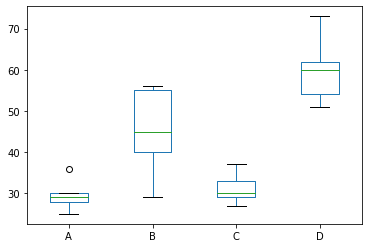

In [3]:
# We have 4 different groups for the ANOVA test

#Visualizing the data using a box plot

df.boxplot(column=["A","B","C","D"],grid=False)

In [4]:
#Using the scipy functions f_oneway to get the p-value and the f-values

f_value,p_value = stats.f_oneway(df["A"],df["B"],df["C"],df["D"])
print(f_value,p_value)

17.492810457516338 2.639241146210922e-05


In [5]:
# Since the p-value is very small we can reject the null hypothesis

In [6]:
# Melt the dataframe so it has the shape suitable for our ANOVA test

df_melt = pd.melt(df.reset_index(),id_vars=["index"],value_vars=["A","B","C","D"])
df_melt.head()

,index,variable,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29


In [7]:
# Perform Ordinary Least Square model on the variable column

model = ols("value ~ C(variable)",data=df_melt).fit()

In [8]:
# Getting the results from the ANOVA test by calling the Statsmodel function

anova_table = sm.stats.anova_lm(model,typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(variable),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


In [13]:
import seaborn as sns
import numpy as np

In [10]:
# reading the dataset
df_two = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/twowayanova.txt",sep="\t")
df_two.head()

,Genotype,1_year,2_year,3_year
0,A,1.53,4.08,6.69
1,A,1.83,3.84,5.97
2,A,1.38,3.96,6.33
3,B,3.60,5.70,8.55
4,B,2.94,5.07,7.95


In [11]:
# melt the dataframe

df_two_melt = pd.melt(df_two,id_vars=["Genotype"],value_vars=["1_year","2_year","3_year"])
df_two_melt.head()

,Genotype,variable,value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94


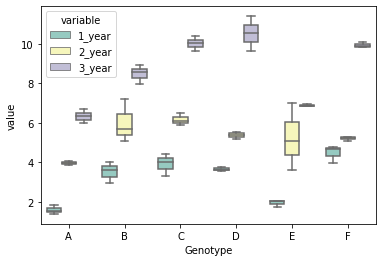

In [15]:
# Plot our melted dataset as a box plot

sns.boxplot(x="Genotype",y="value",hue="variable",data=df_two_melt,palette="Set3")

In [22]:
#Fitting our OLS model

model2 = ols("value~C(Genotype)+C(variable)+C(Genotype):C(variable)",data=df_two_melt).fit()

In [23]:
# Calculate our two-way ANOVA

avova_table = sm.stats.anova_lm(model2,typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(variable),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


# Chi-Square Test

In [24]:
#simulating our dataset

all_population = pd.DataFrame(["white"]*100000 + ["hispanic"]*60000 + ["black"]*50000 + ["asian"]*15000 + ["other"]*35000)
our_sample = pd.DataFrame(["white"]*600 + ["hispanic"]*300 + ["black"]*250 + ["asian"]*75 + ["other"]*150)

In [26]:
#Converting the dataframe into a cross table for ease of calculations

all_population_table = pd.crosstab(index=all_population[0],columns="count")
print(all_population_table)

col_0      count
0               
asian      15000
black      50000
hispanic   60000
other      35000
white     100000


In [27]:
our_sample_table = pd.crosstab(index=our_sample[0],columns="count")
print(our_sample_table)

col_0     count
0              
asian        75
black       250
hispanic    300
other       150
white       600


In [28]:
# Getting the ratio for each group in our population 

all_population_ratios = all_population_table / len(all_population)
print(all_population_ratios)

col_0        count
0                 
asian     0.057692
black     0.192308
hispanic  0.230769
other     0.134615
white     0.384615


In [29]:
#Getting the expected counts

expected_counts = all_population_ratios * len(our_sample)
print(expected_counts)

col_0          count
0                   
asian      79.326923
black     264.423077
hispanic  317.307692
other     185.096154
white     528.846154


In [30]:
# Applying the chi-squared formula

chi_squared_stat = (((our_sample_table-expected_counts)**2)/expected_counts).sum()
print(chi_squared_stat)

col_0
count    18.194805
dtype: float64


In [31]:
# Checking if the chi-squared statistic is valid or not by using the p-value. But first we find the critical value with a 
# confidence interval of 95%

critical_value = stats.chi2.ppf(q=0.95,df=4)
print(critical_value)

9.487729036781154


In [32]:
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,df=4)
print(p_value)

[0.00113047]


In [33]:
# Simulating a trial for a new drug and we want to know if the response has nothing to do with gender or not

import scipy
import scipy.special
ar = np.array([[6.0,3.0],[2.0,12.0]])
df=pd.DataFrame(ar,columns=["Responded","No Response"])
df.index = ["Males","Females"]
df.head()

,Responded,No Response
Males,6.0,3.0
Females,2.0,12.0


In [34]:
#Copying the dataframe and adding a new row that contains the sum of each column and a new column that contains the sum of
# each row

df2 = df.copy()
df2.loc["Column_Total"] = df2.sum(numeric_only=True,axis=0)
df2.loc[:,"Row_Total"] = df2.sum(numeric_only=True,axis=1)
df2.head()

,Responded,No Response,Row_Total
Males,6.0,3.0,9.0
Females,2.0,12.0,14.0
Column_Total,8.0,15.0,23.0


In [35]:
# Performing the fisher exact test

oddsratio,pvalue = stats.fisher_exact(df)

oddsratio,pvalue

(12.0, 0.02276092463197055)